In [43]:
# import packages
import requests
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [44]:
# import original tweet data
file1 = open("TwitterData.txt", "r")
textfile = file1.read()
tweets = textfile.splitlines()
while("" in tweets) :
    tweets.remove("")

In [51]:
def slang(tweets):
    # List to save slang percentage of each tweet
    slangPerc = []
    # LINUX kernel English dictionary
    file = open("/usr/share/dict/words", "r")
    # list of words in English dictionary
    words = re.sub("[^\w]", " ",  file.read()).split()
    # Compares words in tweet to English dictionary to identify slang
    for i in range(len(tweets)):
        # count slang words in tweet
        count = 0
        # list of words in the tweet
        tweetWords = tweets[i].split()
        if len(tweetWords) != 0:
            # iterate through list to compare each word to English dictionary to check for slang
            for j in range(len(tweetWords)):
                word = tweetWords[j]
                if word.strip().lower() in words:
                    continue
                else:
                    count += 1
            slangPerc.append(count/len(tweetWords))
    return slangPerc

In [54]:
sp = slang(tweets)

In [58]:
# list of re-translated tweets
file2 = open("TranslatedData.txt", "r")
textfile = file2.read()
translatedTweets = textfile.splitlines()
while("" in translatedTweets) :
    translatedTweets.remove("")

In [1]:
# import Chinese re-translation
! aws s3 ls s3://translate-file-portnoy/translate/Chinese/en.zh.TwitterData.txt


An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [61]:
def match(tweets, translatedTweets):
    # List to save match percentage of each tweet
    matchPerc = []
    # Compares words in re-translated tweet to original tweet
    for i in range(len(translatedTweets)):
        # list of words in original tweet
        words = tweets[i].split()
        # count matched words in tweet
        count = 0
        # list of words in the re-translated tweet
        tweetWords = translatedTweets[i].split()
        # iterate through list to compare each word to English dictionary to check for slang
        for j in range(len(tweetWords)):
            try:
                word1 = tweetWords[j]
                word2 = words[j]
                if word1.strip().lower() == word2.strip().lower():
                    count += 1
            except:
                continue
        matchPerc.append(count/len(tweetWords))
    return matchPerc

In [63]:
mp = match(tweets, translatedTweets)

In [64]:
# Create dataframe of slang percentage and match percentage for each tweet
df = pd.DataFrame(list(zip(sp, mp)), columns =['Slang_Percentage', 'Match_Percentage'])

Text(0.5, 1.0, 'Distribution of Match Percentage')

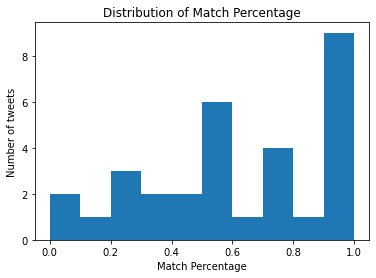

In [65]:
# Histogram to visualise distribution of match percentage data
plt.hist(df['Match_Percentage'])
plt.xlabel('Match Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Match Percentage')

Text(0.5, 1.0, 'Distribution of Slang Percentage')

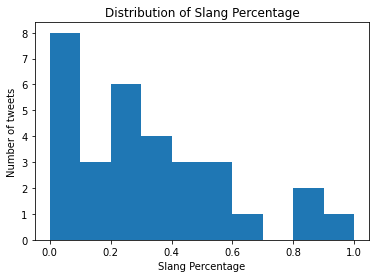

In [71]:
# Histogram to visualise distribution of slang percentage data
plt.hist(df['Slang_Percentage'])
plt.xlabel('Slang Percentage')
plt.ylabel('Number of tweets')
plt.title('Distribution of Slang Percentage')

Text(0, 0.5, 'Match Percentage')

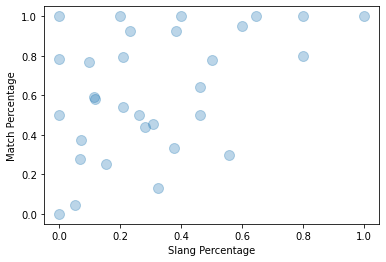

In [66]:
# Plot of match percentage against slang percentage for our data set
plt.plot(df['Slang_Percentage'], df['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.xlabel('Slang Percentage')
plt.ylabel('Match Percentage')

In [67]:
# Correlation between slang percentage and match percentage in our data set
df.corr()

,Slang_Percentage,Match_Percentage
Slang_Percentage,1.000000,0.433974
Match_Percentage,0.433974,1.000000


In [68]:
# OLS regression of match percentage on slang percentage
results = smf.ols('Match_Percentage ~ Slang_Percentage', data = df).fit()

In [69]:
# Results of OLS regression
results.params

Intercept           0.459521
Slang_Percentage    0.509961
dtype: float64

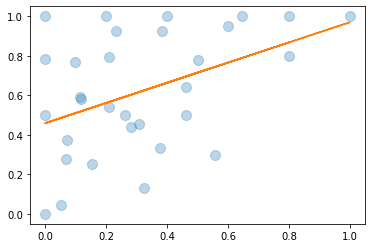

In [70]:
# Plot of data with OLS regression line imposed on top
plt.plot(df['Slang_Percentage'], df['Match_Percentage'], 'o', alpha=0.3, markersize=10)
plt.plot(df['Slang_Percentage'], results.predict(df['Slang_Percentage']))